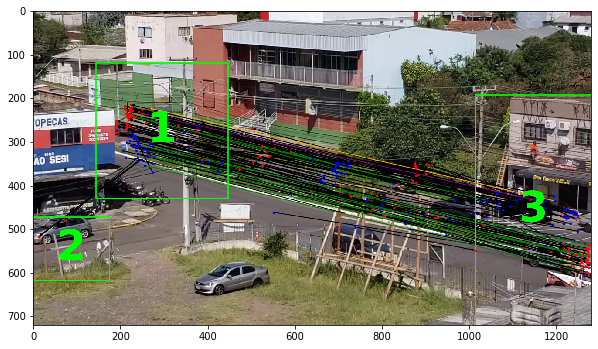

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import pickle
import cv2 as cv2

filename = "RUBEM_BERTA_4_60_6_vric"
MIN_DISTANCE = 100
#df = pd.read_csv(f"classified_data_{filename}.csv",converters={"bbox": literal_eval,"last_3x":literal_eval,"last_3y":literal_eval})
df = pickle.load(open(f"classified_data_{filename}.pkl","rb"))

videoname = "RUBEM_BERTA_4"

vidcap = cv2.VideoCapture(f"./data/{videoname}.mp4")
WIDTH = int(vidcap.get(cv2.CAP_PROP_FRAME_WIDTH))  
HEIGHT = int(vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT))
my_dpi = 96

plt.figure(figsize=(10,16))
im = plt.imread( f"regions_{filename}.png")
plt.imshow(im)

In [4]:
# Filter data that has same entry and exit points -> bad tracking ? this wont fix it
data = df[(df.entry_box != 0) | (df.exit_box != 0)]
#no_entry = df[(df.entry_box == 0) & (df.exit_box != 0) & (df.entry_box != df.exit_box)]
#no_exit = df[(df.exit_box == 0) & (df.entry_box != 0) & (df.entry_box != df.exit_box)]
#df = df[(df.entry_box != df.exit_box) & (df.entry_box != 0) & (df.exit_box != 0)]
df

,track_id,bbox,class,frame,x,y,last_3x,last_3y,last_x,last_y,last_bboxes,distance,est_dx,est_dy,entry_box,exit_box
2,3,"[788, 371, 866, 420]",car,6,827.0,324.5,"[196.5, 194.0, 191.0]","[452.5, 453.5, 454.5]",191.0,454.5,"[[180, 253, 213, 282], [177, 251, 211, 282], [...",649.150214,-1.833333,0.666667,0,1
4,5,"[1118, 506, 1233, 570]",car,6,1175.5,182.0,"[1266.0, 1268.5, 1271.0]","[144.0, 144.5, 144.0]",1271.0,144.0,"[[1244, 551, 1288, 601], [1249, 552, 1288, 599...",102.782537,1.666667,0.000000,3,3
7,8,"[682, 452, 798, 539]",car,6,740.0,224.5,"[992.0, 1008.0, 1015.5]","[176.0, 172.5, 171.0]",1015.5,171.0,"[[907, 500, 1077, 588], [927, 504, 1089, 591],...",280.646575,7.833333,-1.666667,0,3
121,15,"[1127, 458, 1259, 521]",car,19,1193.0,230.5,"[194.5, 192.0, 189.5]","[455.0, 455.5, 456.0]",189.5,456.0,"[[173, 251, 216, 279], [171, 250, 213, 279], [...",1028.524428,-1.666667,0.333333,3,1
181,18,"[629, 351, 685, 398]",car,25,657.0,345.5,"[218.0, 215.5, 212.0]","[445.0, 446.5, 447.5]",212.0,447.5,"[[186, 257, 250, 293], [183, 255, 248, 292], [...",456.540250,-2.000000,0.833333,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70726,733,"[1172, 444, 1259, 498]",car,8920,1215.5,249.0,"[860.5, 854.5, 849.0]","[315.5, 316.0, 317.0]",849.0,317.0,"[[830, 389, 891, 420], [829, 391, 880, 417], [...",372.754946,-3.833333,0.500000,3,0
71175,736,"[688, 350, 743, 395]",car,8977,715.5,347.5,"[556.0, 549.5, 543.5]","[387.0, 388.0, 388.0]",543.5,388.0,"[[532, 320, 580, 346], [527, 320, 572, 344], [...",176.703848,-4.166667,0.333333,0,0
71287,737,"[247, 304, 277, 361]",motorcycle,8990,262.0,387.5,"[1104.0, 1117.0, 1129.5]","[180.0, 178.0, 174.5]",1129.5,174.5,"[[1076, 509, 1132, 571], [1088, 510, 1146, 574...",893.266618,8.500000,-1.833333,1,3
71438,738,"[220, 277, 259, 326]",car,9005,239.5,418.5,"[624.5, 632.0, 638.0]","[308.0, 307.0, 306.0]",638.0,306.0,"[[567, 380, 682, 444], [575, 381, 689, 445], [...",414.075476,4.500000,-0.666667,1,0


In [6]:
print("Cars:")
cars_entry = df.loc[df["class"] == "car"]["entry_box"].value_counts()
print(cars_entry)
print("Motorcycles:")
motorcycle_entry = df.loc[df["class"] == "motorcycle"]["entry_box"].value_counts()
print(motorcycle_entry)
print("Buses:")
bus_entry = df.loc[df["class"] == "bus"]["entry_box"].value_counts()
print(bus_entry)
print("Trucks:")
truck_entry = df.loc[df["class"] == "truck"]["entry_box"].value_counts()
print(truck_entry)

entry_dfs = [cars_entry,motorcycle_entry,bus_entry,truck_entry]

Cars:
0    46
3    43
1    39
Name: entry_box, dtype: int64
Motorcycles:
1    7
0    4
3    1
Name: entry_box, dtype: int64
Buses:
3    1
Name: entry_box, dtype: int64
Trucks:
3    1
Name: entry_box, dtype: int64


In [8]:
print("Cars:")
cars_exit = df.loc[df["class"] == "car"]["exit_box"].value_counts()
print(cars_exit)
print(cars_exit.count())
print("Motorcycles:")
motorcycle_exit = df.loc[df["class"] == "motorcycle"]["exit_box"].value_counts()
print(motorcycle_exit)
print("Buses:")
bus_exit = df.loc[df["class"] == "bus"]["exit_box"].value_counts()
print(bus_exit)
print("Trucks:")
truck_exit = df.loc[df["class"] == "truck"]["exit_box"].value_counts()
print(truck_exit)

exit_dfs = [cars_exit,motorcycle_exit,bus_exit,truck_exit]

Cars:
1    54
0    38
3    33
2     3
Name: exit_box, dtype: int64
4
Motorcycles:
3    8
1    2
0    2
Name: exit_box, dtype: int64
Buses:
1    1
Name: exit_box, dtype: int64
Trucks:
1    1
Name: exit_box, dtype: int64


In [10]:
print(f"Percentage of entries inside of the regions: {np.count_nonzero(df.entry_box.values)/df.entry_box.values.size *100:.2f} % ")
print(f"Percentage of exits inside the regions {np.count_nonzero(df.exit_box.values)/df.exit_box.values.size *100:.2f} %")
print(f"Percentage of valid entries and exits: {((np.count_nonzero(df.entry_box.values) + np.count_nonzero(df.exit_box.values))/ (2 *df.exit_box.values.size)) *100:.2f} %")

Percentage of entries inside of the regions: 64.79 % 
Percentage of exits inside the regions 71.83 %
Percentage of valid entries and exits: 68.31 %


In [12]:
entries = []
for i,j,k in zip(df["class"],df["entry_box"],df["exit_box"]):
    if (j != 0 and k != 0) and (j != k):
        entries.append((i,j,k))
from collections import Counter
Counter(entries)

Counter({('car', 3, 1): 20,
         ('car', 1, 3): 20,
         ('car', 1, 2): 3,
         ('motorcycle', 1, 3): 7,
         ('truck', 3, 1): 1,
         ('bus', 3, 1): 1,
         ('motorcycle', 3, 1): 1})

In [14]:
'''fig = plt.figure(figsize=(WIDTH/my_dpi, HEIGHT/my_dpi), dpi=my_dpi)
img = plt.imread("first_frame.png")
plt.imshow(img, extent=[0, WIDTH, 0, HEIGHT])

plt.quiver(no_entry["x"], no_entry["y"], ((no_entry["last_x"] - no_entry["x"])), ((no_entry["last_y"] - no_entry["y"])),
                    angles="xy", scale_units="xy", scale=1, width=0.0015, color="red")
plt.quiver(no_exit["x"], no_exit["y"], ((no_exit["last_x"] - no_exit["x"])), ((no_exit["last_y"] - no_exit["y"])),
                    angles="xy", scale_units="xy", scale=1, width=0.0015, color="blue")
plt.show()'''

'fig = plt.figure(figsize=(WIDTH/my_dpi, HEIGHT/my_dpi), dpi=my_dpi)\nimg = plt.imread("first_frame.png")\nplt.imshow(img, extent=[0, WIDTH, 0, HEIGHT])\n\nplt.quiver(no_entry["x"], no_entry["y"], ((no_entry["last_x"] - no_entry["x"])), ((no_entry["last_y"] - no_entry["y"])),\n                    angles="xy", scale_units="xy", scale=1, width=0.0015, color="red")\nplt.quiver(no_exit["x"], no_exit["y"], ((no_exit["last_x"] - no_exit["x"])), ((no_exit["last_y"] - no_exit["y"])),\n                    angles="xy", scale_units="xy", scale=1, width=0.0015, color="blue")\nplt.show()'

In [15]:
'''no_entry'''

'no_entry'

In [16]:
'''no_exit'''

'no_exit'

In [17]:
'''assigned_track_ids = []

for idx,no_entry_row in no_entry.iterrows():
    frame_dis = np.inf
    track_id = 0
    for idx2,no_exit_row in no_exit.iterrows():
        frame_dis_at = abs(no_entry_row.frame - no_exit_row.frame)
        if (frame_dis_at < frame_dis) and (frame_dis_at != 0) and (no_entry_row["class"] == no_exit_row["class"]) and (no_exit_row.track_id not in assigned_track_ids):
            frame_dis = frame_dis_at      
            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"entry_box"] = no_exit_row.entry_box
            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"x"] = no_exit_row.x
            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"y"] = no_exit_row.y
            track_id = no_exit_row.track_id
    assigned_track_ids.append(track_id)'''


'assigned_track_ids = []\n\nfor idx,no_entry_row in no_entry.iterrows():\n    frame_dis = np.inf\n    track_id = 0\n    for idx2,no_exit_row in no_exit.iterrows():\n        frame_dis_at = abs(no_entry_row.frame - no_exit_row.frame)\n        if (frame_dis_at < frame_dis) and (frame_dis_at != 0) and (no_entry_row["class"] == no_exit_row["class"]) and (no_exit_row.track_id not in assigned_track_ids):\n            frame_dis = frame_dis_at      \n            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"entry_box"] = no_exit_row.entry_box\n            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"x"] = no_exit_row.x\n            no_entry.loc[no_entry.track_id == no_entry_row.track_id,"y"] = no_exit_row.y\n            track_id = no_exit_row.track_id\n    assigned_track_ids.append(track_id)'

In [70]:
cars_entry

3    44
1    36
0    35
Name: entry_box, dtype: int64

In [71]:
cars_exit

3    44
1    44
0    27
Name: exit_box, dtype: int64